In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import urllib.request
import os

plik = 'pomiary2020.xlsx'
URL = "https://byes.pl/wp-content/uploads/datasets/" + plik
if not os.path.isfile(plik):
    print('Pobieram plik z ', URL)
    urllib.request.urlretrieve(URL, plik)
    print('Pobrano plik')
else:
    print(f'Plik {plik} już jest na dysku')

dane = pd.read_excel(plik) 
dane.sample(4)

Plik pomiary2020.xlsx już jest na dysku


,waga,wzrost,płeć,puls przed,puls po,czas
22,60.0,184,M,86,83,124
41,68.0,178,M,70,81,90
24,73.0,178,M,98,118,190
36,75.0,180,K,84,95,85


In [3]:
cecha = 'wzrost'
X = dane[cecha].values
X_mezcz = X[dane['płeć']=='M']
X_kob = X[dane['płeć']=='K']
print(f"Wszystkich: {X.size}\nKobiet: {X_kob.size}\nMężczyzn: {X_mezcz.size}")

Wszystkich: 46
Kobiet: 9
Mężczyzn: 37


In [4]:
def rozklad_norm(parametry, x):
    mu, sigma = parametry
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

In [5]:
mu_wszyscy, sigma_wszyscy = X.mean(), X.std()
mu_mezcz, sigma_mezcz = X_mezcz.mean(), X_mezcz.std()
mu_kob, sigma_kob = X_kob.mean(), X_kob.std()

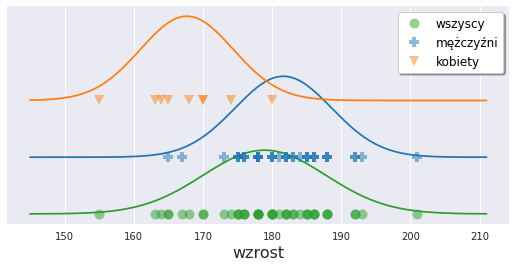

In [6]:
os_x = np.linspace(X.min()-10, X.max()+10, num=300)

os_y_wszyscy = rozklad_norm([mu_wszyscy, sigma_wszyscy], os_x)
os_y_mezcz = rozklad_norm([mu_mezcz, sigma_mezcz], os_x)
os_y_kob = rozklad_norm([mu_kob, sigma_kob], os_x)

with plt.style.context('seaborn'):  
    plt.figure(figsize=(9,4))
    plt.plot(X, np.zeros_like(X), 'o', 
             markersize=10, alpha=0.5, markerfacecolor='tab:green', markeredgecolor='tab:green', 
             label='wszyscy')
    plt.plot(os_x, 25*os_y_wszyscy, color='tab:green')
    plt.plot(X_mezcz, np.ones_like(X_mezcz), 'P', 
             markersize=10, alpha=0.5, markerfacecolor='tab:blue', markeredgecolor='tab:blue', 
             label='mężczyźni')
    plt.plot(os_x, 25*os_y_mezcz+1, color='tab:blue')
    plt.plot(X_kob, 2*np.ones_like(X_kob), 'v', 
             markersize=10, alpha=0.5, markerfacecolor='tab:orange', markeredgecolor='tab:orange', 
             label='kobiety')
    plt.plot(os_x, 25*os_y_kob+2, color='tab:orange')
    plt.xlabel(cecha, fontsize=16)
    plt.yticks([])
plt.legend(shadow=True, fontsize=12)
plt.show()

In [8]:
from scipy import stats

print(f'Cały zbiór | test Shapiro: {stats.shapiro(X)}')
print(f'Cały zbiór | test D’Agostino i Pearsona: {stats.normaltest(X)}\n')

print(f'Podzbiór kobiety | test Shapiro: {stats.shapiro(X_kob)}')
print(f'Podzbiór kobiety | test D’Agostino i Pearsona: {stats.normaltest(X_kob)}\n')

print(f'Podzbiór mężczyźni | test Shapiro: {stats.shapiro(X_mezcz)}')
print(f'Podzbiór mężczyźni | test D’Agostino i Pearsona: {stats.normaltest(X_mezcz)}\n')

Cały zbiór | test Shapiro: ShapiroResult(statistic=0.9832735657691956, pvalue=0.7415264844894409)
Cały zbiór | test D’Agostino i Pearsona: NormaltestResult(statistic=1.3865097636945565, pvalue=0.4999461522561214)

Podzbiór kobiety | test Shapiro: ShapiroResult(statistic=0.9801318645477295, pvalue=0.9649487733840942)
Podzbiór kobiety | test D’Agostino i Pearsona: NormaltestResult(statistic=0.5004986330562435, pvalue=0.7786066393666938)

Podzbiór mężczyźni | test Shapiro: ShapiroResult(statistic=0.977599561214447, pvalue=0.6480407118797302)
Podzbiór mężczyźni | test D’Agostino i Pearsona: NormaltestResult(statistic=1.8750725444468217, pvalue=0.39159142252762885)

